In [22]:
import spacy
import sklearn.cluster as cluster
import scipy.spatial.distance as sdist
import spacy
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
import re
from bs4 import BeautifulSoup
import unicodedata
import unidecode
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_similarity, pairwise_distances
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction import text
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
%matplotlib inline
nlp = spacy.load('en')
remove_digits = True
pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'

In [23]:
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text

def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

def remove_special_characters(text, remove_digits=True):
    text = re.sub(pattern, '', text)
    return text

def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')
data = pd.read_csv('/Users/rahulsharma/dataset 2/news.csv')
df = data.copy()
tempp = df.copy()



In [24]:
df = pd.read_csv('Clustering-Ori-Data.csv')

In [25]:
for index, row in df.iterrows():
    t2 = strip_html_tags(row['full_text'])
    t3 = remove_accented_chars(t2)
    t4 = remove_special_characters(t3)
    t8 = remove_stopwords(t4)
    row['full_text'] = t8

In [76]:
text_content = df['full_text']
vector = TfidfVectorizer()
tfidf = vector.fit_transform(text_content)

In [77]:
from sklearn import decomposition
svd = decomposition.TruncatedSVD(n_components=4,n_iter=15)
svd.fit(tfidf)

TruncatedSVD(algorithm='randomized', n_components=4, n_iter=15,
       random_state=None, tol=0.0)

In [79]:
X_svd = svd.transform(tfidf)

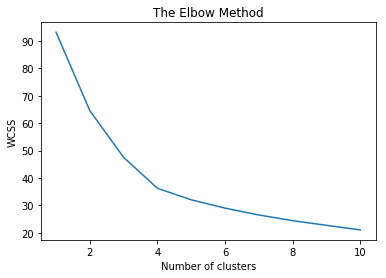

In [80]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X_svd)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig('elbow.png')
plt.show()

In [81]:
kmeans = cluster.KMeans(n_clusters=4, random_state=0).fit(X_svd)

In [82]:
clus = kmeans.fit_predict(X_svd)

In [83]:
clus

array([2, 1, 1, ..., 1, 1, 1], dtype=int32)

In [84]:
df['clusters_full_text'] = clus

In [85]:
df

,Unnamed: 0,id,headline,text,full_text,clusters_full_text
0,0,uid-1,market advance,new york ap prime rate reduction new york firs...,market advance new york ap prime rate reductio...,2
1,1,uid-2,district boost request antiterrorism aid list ...,mayor anthony william petition white house yes...,district boost request antiterrorism aid list ...,1
2,2,uid-3,election here mate,downunder perspective australia united state c...,election here mate downunder perspective austr...,1
3,3,uid-4,big boom ever,rewrite history unless recession begin next da...,big boom ever rewrite history unless recession...,3
4,4,uid-5,economic aide see uptrend,sedate scholarly dr arthur burn excolumbia pro...,economic aide see uptrend sedate scholarly dr ...,1
5,5,uid-6,manager journal sniff drug abuser no quick fix,statistic enormous cost employee drug abuse we...,manager journal sniff drug abuser no quick fix...,1
6,6,uid-7,stock market quarterly review lead us tribulat...,global market end third quarter much way begin...,stock market quarterly review lead us tribulat...,2
7,7,uid-8,digest,consumer borrowing surge july mainly reflect h...,digest consumer borrowing surge july mainly re...,3
8,8,uid-9,september unemployment fall rate repeat year l...,washington unexpected decline september unempl...,september unemployment fall rate repeat year l...,3
9,9,uid-10,clinton plan gain greenspan praise panetta ind...,immrab travel master ceremoni salcb manager ec...,clinton plan gain greenspan praise panetta ind...,1


In [86]:
df['clusters_full_text'].value_counts()

1    1570
0     495
2     493
3     442
Name: clusters_full_text, dtype: int64

In [34]:
def simple_stemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

In [87]:
np.savetxt("Svd_ans_4.txt",X_svd)

In [88]:
dff = df.copy()
dff.drop({'headline', 'text','full_text'},axis=1,inplace=True)
dff = dff.rename(columns={'clusters_full_text': 'cluster'})


In [90]:
dff.drop({'Unnamed: 0'},axis=1,inplace=True)

In [92]:
dff.to_csv('Final-Clustering-SVD-4.csv', index=False)

In [45]:
temp = df.copy()

In [47]:
for index, row in temp.iterrows():
    t1 = row['full_text']
    t2 = t1.encode("utf-8")
    t3 = unicode(t2,"utf-8")
    t4 = simple_stemmer(t3)
    t8 = t4.encode("utf-8")
    row['full_text'] = t8

In [54]:
stemmer2 = SnowballStemmer("english", ignore_stopwords=False)

In [71]:
t3 = stemmer2.stem(t2)

In [58]:
lemmatize_text(u"My system keeps crashing his crashed yesterday, ours crashes daily")

u'My system keep crash his crashed yesterday , ours crash daily'

In [72]:
c = Counter(t3.split()).most_common()
len(c)

57